In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np


class DataLoader:
    def __init__(self):
        pass
    
    def load_data(self):
        acc_x_train = pd.read_csv("/workspace/unicamp/IA048/Exercise_Linear_Classification/data/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt", delim_whitespace=True, header=None)
        acc_y_train = pd.read_csv("/workspace/unicamp/IA048/Exercise_Linear_Classification/data/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/body_acc_y_train.txt", delim_whitespace=True, header=None)
        acc_z_train = pd.read_csv("/workspace/unicamp/IA048/Exercise_Linear_Classification/data/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt", delim_whitespace=True, header=None)
        gyro_x_train = pd.read_csv("/workspace/unicamp/IA048/Exercise_Linear_Classification/data/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/body_gyro_x_train.txt", delim_whitespace=True, header=None)
        gyro_y_train = pd.read_csv("/workspace/unicamp/IA048/Exercise_Linear_Classification/data/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/body_gyro_y_train.txt", delim_whitespace=True, header=None)
        gyro_z_train = pd.read_csv("/workspace/unicamp/IA048/Exercise_Linear_Classification/data/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/body_gyro_z_train.txt", delim_whitespace=True, header=None)

        acc_x_test = pd.read_csv("/workspace/unicamp/IA048/Exercise_Linear_Classification/data/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt", delim_whitespace=True, header=None)
        acc_y_test = pd.read_csv("/workspace/unicamp/IA048/Exercise_Linear_Classification/data/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/body_acc_y_test.txt", delim_whitespace=True, header=None)
        acc_z_test = pd.read_csv("/workspace/unicamp/IA048/Exercise_Linear_Classification/data/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/body_acc_z_test.txt", delim_whitespace=True, header=None)
        gyro_x_test = pd.read_csv("/workspace/unicamp/IA048/Exercise_Linear_Classification/data/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/body_gyro_x_test.txt", delim_whitespace=True, header=None)
        gyro_y_test = pd.read_csv("/workspace/unicamp/IA048/Exercise_Linear_Classification/data/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/body_gyro_y_test.txt", delim_whitespace=True, header=None)
        gyro_z_test = pd.read_csv("/workspace/unicamp/IA048/Exercise_Linear_Classification/data/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/body_gyro_z_test.txt", delim_whitespace=True, header=None)

        X_train = pd.concat([acc_x_train, acc_y_train, acc_z_train, gyro_x_train, gyro_y_train, gyro_z_train], axis=1)
        y_train = pd.read_csv("/workspace/unicamp/IA048/Exercise_Linear_Classification/data/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None)

        X_test = pd.concat([acc_x_test, acc_y_test, acc_z_test, gyro_x_test, gyro_y_test, gyro_z_test], axis=1)
        y_test = pd.read_csv("/workspace/unicamp/IA048/Exercise_Linear_Classification/data/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt", delim_whitespace=True, header=None)
        
        return X_train, y_train, X_test, y_test

class ClassifierTrainer:
    def __init__(self, classifier, cv_folds=5):
        self.classifier = classifier
        self.cv_folds = cv_folds
        self.scores = {}
    
    def cross_validate_model(self, X, y):
        scoring = {'accuracy': 'accuracy',
                   'precision': make_scorer(precision_score, average='weighted'),
                   'recall': make_scorer(recall_score, average='weighted'),
                   'f1': make_scorer(f1_score, average='weighted')}
        self.scores = cross_validate(self.classifier, X, y, cv=self.cv_folds, scoring=scoring, return_train_score=True)
        return self.scores

    def print_scores(self):
        for metric, values in self.scores.items():
            print(f"{metric}: Mean={np.mean(values):.3f}, Std={np.std(values):.3f}")

### Primeira parte
Primeiramente, ser ́a explorada uma vers ̃ao do conjunto de dados na qual j ́a houve pr ́e-processamento e extra ̧c ̃ao
de caracter ́ısticas. No caso, cada amostra cont ́em 561 atributos derivados de uma mesma janela de 2,56 s dos 6
sinais dispon ́ıveis (ACC: x,y,z; GYR: x,y,z), considerando suas representa ̧c ̃oes tanto no dom ́ınio do tempo quanto
no dom ́ınio da frequˆencia.

Construa uma solu ̧c ̃ao para este problema baseada no modelo de regress ̃ao log ́ıstica. Descreva a abordagem
escolhida para resolvˆe-lo (softmax, classificadores bin ́arios combinados em um esquema um-contra-um ou
um-contra-todos). Obtenha, ent ̃ao, a matriz de confus ̃ao para o classificador considerando os dados do
conjunto de teste. Al ́em disso, adote uma m ́etrica global para a avalia ̧c ̃ao do desempenho (m ́edio) deste
classificador. Discuta os resultados obtidos.

In [3]:
# Load data
loader = DataLoader()
X_train, y_train, X_test, y_test = loader.load_data()

# Instantiate trainer and classifiers
ovo_trainer = ClassifierTrainer(OneVsOneClassifier(LogisticRegression(max_iter=1000)), cv_folds=10)
ova_trainer = ClassifierTrainer(LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=1000), cv_folds=10)
softmax_trainer = ClassifierTrainer(LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000), cv_folds=10)

# Cross-validate models
ovo_scores = ovo_trainer.cross_validate_model(X_train, y_train)
ova_scores = ova_trainer.cross_validate_model(X_train, y_train)
softmax_scores = softmax_trainer.cross_validate_model(X_train, y_train)

# Print results
print("One-vs-One Performance:")
ovo_trainer.print_scores()
print()

print("One-vs-All Performance:")
ova_trainer.print_scores()
print()

print("Softmax Performance:")
softmax_trainer.print_scores()


/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was e

One-vs-One Performance:
fit_time: Mean=10.914, Std=5.114
score_time: Mean=0.256, Std=0.246
test_accuracy: Mean=0.312, Std=0.023
train_accuracy: Mean=0.453, Std=0.004
test_precision: Mean=0.323, Std=0.021
train_precision: Mean=0.481, Std=0.005
test_recall: Mean=0.312, Std=0.023
train_recall: Mean=0.453, Std=0.004
test_f1: Mean=0.302, Std=0.023
train_f1: Mean=0.455, Std=0.004

One-vs-All Performance:
fit_time: Mean=13.798, Std=3.337
score_time: Mean=0.171, Std=0.152
test_accuracy: Mean=0.312, Std=0.018
train_accuracy: Mean=0.438, Std=0.004
test_precision: Mean=0.322, Std=0.026
train_precision: Mean=0.467, Std=0.003
test_recall: Mean=0.312, Std=0.018
train_recall: Mean=0.438, Std=0.004
test_f1: Mean=0.291, Std=0.022
train_f1: Mean=0.428, Std=0.003

Softmax Performance:
fit_time: Mean=16.815, Std=5.393
score_time: Mean=0.095, Std=0.048
test_accuracy: Mean=0.317, Std=0.018
train_accuracy: Mean=0.443, Std=0.004
test_precision: Mean=0.323, Std=0.020
train_precision: Mean=0.468, Std=0.003
test

In [4]:
import pandas as pd

from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.multiclass import (
    OneVsOneClassifier,
    OneVsRestClassifier,
    OutputCodeClassifier,
)
from sklearn.tree import DecisionTreeClassifier

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=5, random_state=0)

logistic_regressor = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)
ovo_tree = OneVsOneClassifier(logistic_regressor)
ovr_logistic_regressor = OneVsRestClassifier(logistic_regressor)
# ecoc = OutputCodeClassifier(logistic_regressor, code_size=2)

cv_results_logistic_regressor = cross_validate(logistic_regressor, X_train, y_train, cv=cv, n_jobs=2)
cv_results_ovo = cross_validate(ovo_tree, X_train, y_train, cv=cv, n_jobs=2)
cv_results_ovr = cross_validate(ovr_logistic_regressor, X_train, y_train, cv=cv, n_jobs=2)
# cv_results_ecoc = cross_validate(ecoc, X_train, y_train, cv=cv, n_jobs=2)

/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was e

In [18]:
cv_results_logistic_regressor["test_score"]

array([0.29865361, 0.32231742, 0.32408163, 0.30966952, 0.31742146,
       0.32285714, 0.31538148, 0.30558956, 0.33102041, 0.31986944,
       0.31170951, 0.31673469, 0.31864545, 0.30966952, 0.31387755])

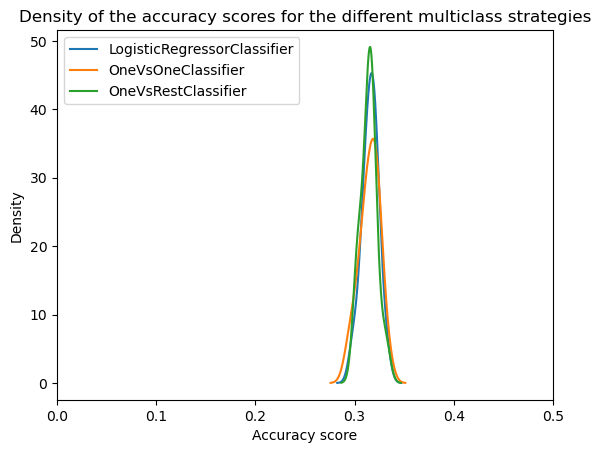

In [20]:
from matplotlib import pyplot as plt

scores = pd.DataFrame(
    {
        "LogisticRegressorClassifier": cv_results_logistic_regressor["test_score"],
        "OneVsOneClassifier": cv_results_ovo["test_score"],
        "OneVsRestClassifier": cv_results_ovr["test_score"],
        # "OutputCodeClassifier": cv_results_ecoc["test_score"],
    }
)
ax = scores.plot.kde(legend=True)
ax.set_xlabel("Accuracy score")
ax.set_xlim([0, 0.5])
_ = ax.set_title(
    "Density of the accuracy scores for the different multiclass strategies"
)

#### I chose LogisticRegression (softmax)

Doing GRIDSEARCH to tune hyperparams

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the model
logistic_regressor = LogisticRegression(multi_class="multinomial", max_iter=1000)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'sag', 'saga', 'newton-cg'],  # Algorithms to use in the optimization problem
    'penalty': ['l2']  # As some solvers only support l2 penalties
}

# Setup the grid search with cross-validation
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=5, random_state=0)
grid_search = GridSearchCV(logistic_regressor, param_grid, cv=cv, n_jobs=2, scoring='accuracy')

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was e

Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Best cross-validation accuracy: 0.3159964473753597


Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Best cross-validation accuracy: 0.3159964473753597

In [7]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_pred, y_test)
conf_matrix = confusion_matrix(y_pred, y_test)

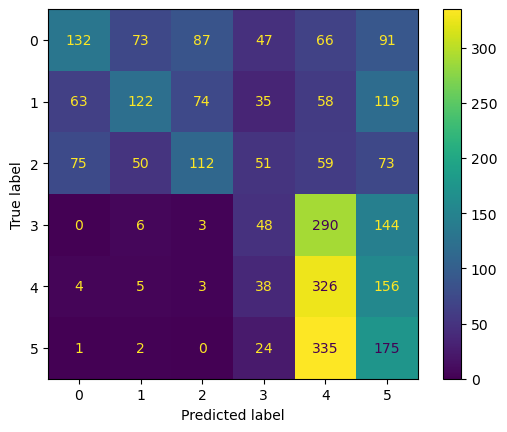

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [22]:
cm

array([[132,  73,  87,  47,  66,  91],
       [ 63, 122,  74,  35,  58, 119],
       [ 75,  50, 112,  51,  59,  73],
       [  0,   6,   3,  48, 290, 144],
       [  4,   5,   3,  38, 326, 156],
       [  1,   2,   0,  24, 335, 175]])

### ITEM B

Considere, agora, a t ́ecnica k-nearest neighbors (kNN). Adotando um esquema de valida ̧c ̃ao cruzada, mostre
como o desempenho do classificador, computado com a mesma m ́etrica adotada no item a)) varia em fun ̧c ̃ao
do parˆametro k. Escolhendo, ent ̃ao, o melhor valor para k, apresente a matriz de confus ̃ao para os dados de
teste e o desempenho medido nesse conjunto. Comente os resultados obtidos, inclusive estabelecendo uma
compara ̧c ̃ao com o desempenho da regress ̃ao log ́ıstica.

/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array 

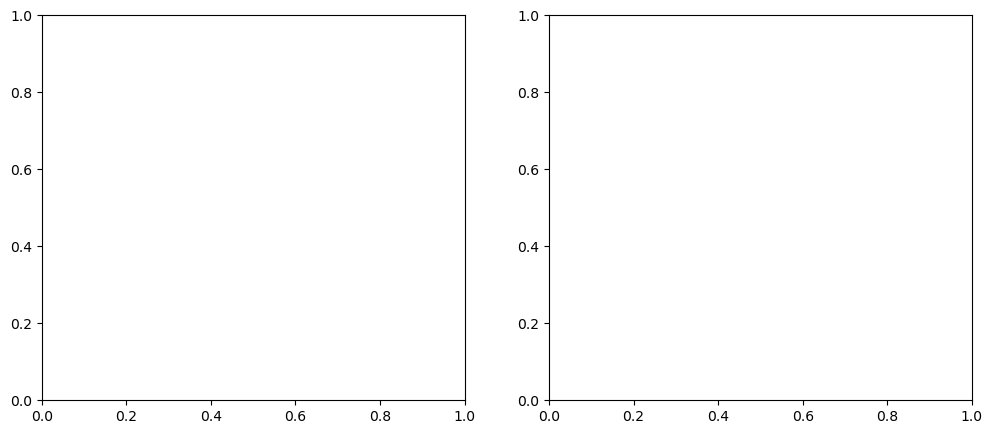

In [9]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

# Define the model
knn_clf = KNeighborsClassifier()
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=5, random_state=0)

accuracies = []
for k in range(1, 26):
    result = {"k":k}
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    cv_results_knn = cross_validate(knn_clf, X_train, y_train, cv=cv)
    result["accuracy"] = cv_results_knn["test_score"].mean()
    accuracies.append(result)

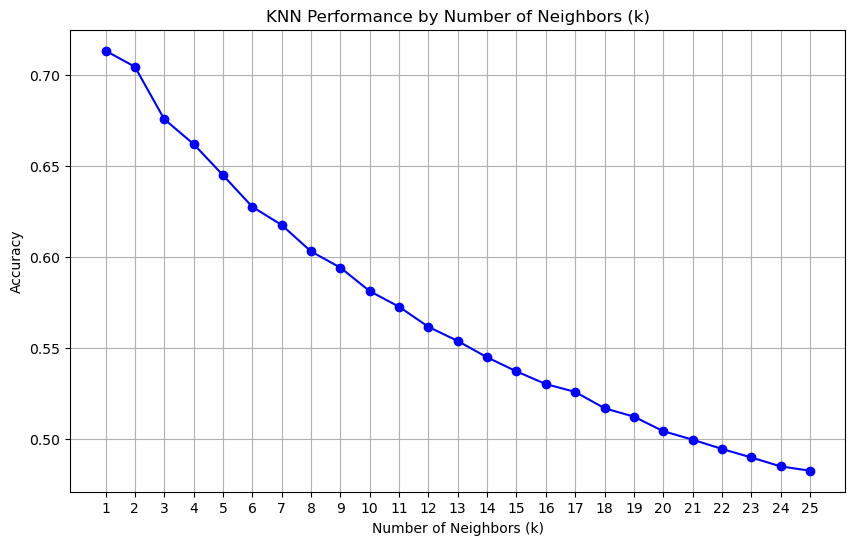

In [10]:
# Extracting k values and their corresponding accuracies
k_values = [item['k'] for item in accuracies]
accuracies = [item['accuracy'] for item in accuracies]

# Creating the plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('KNN Performance by Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(k_values)  # Ensure all k values are marked
plt.show()

In [16]:
accuracies

[0.7134116798086023,
 0.7045976735859582,
 0.6757893071549306,
 0.6621057294398788,
 0.6449946460836478,
 0.6275844983444215,
 0.6176008570706945,
 0.6030470972558749,
 0.5941516138074977,
 0.581202452421197,
 0.5726333219538324,
 0.5615614340391399,
 0.553781274892658,
 0.5448042143009796,
 0.5370786212485811,
 0.5300871225683255,
 0.5257890684629625,
 0.5168119190556679,
 0.5121870456873079,
 0.5041893548933241,
 0.49953742606793833,
 0.4944232674710031,
 0.4897441166593116,
 0.48482064518994056,
 0.48245385334876506]

In [11]:
# Define the model
knn_clf = KNeighborsClassifier()
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=5, random_state=0)
param_grid = {
    "n_neighbors": [1],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"]
}

grid_search = GridSearchCV(knn_clf, param_grid=param_grid, cv=cv, scoring="accuracy", verbose=1)

grid_search.fit(X_train, y_train)

best_model_knn = grid_search.best_estimator_
best_params_knn = grid_search.best_params_
best_score_knn = grid_search.best_score_

print("Best parameters:", best_params_knn)
print("Best score:", best_score_knn)

Fitting 15 folds for each of 6 candidates, totalling 90 fits


/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array 

Best parameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best score: 0.7612622253307688


/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [12]:
y_pred = best_model_knn.predict(X_test)
acc = accuracy_score(y_pred, y_test)
conf_matrix = confusion_matrix(y_pred, y_test)

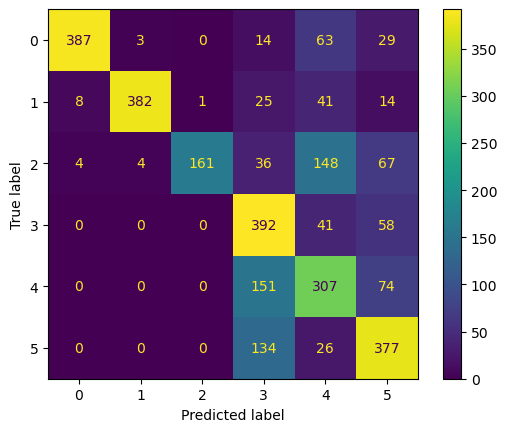

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred = best_model_knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [14]:
acc

0.6806922293858161

In [15]:
cm

array([[387,   3,   0,  14,  63,  29],
       [  8, 382,   1,  25,  41,  14],
       [  4,   4, 161,  36, 148,  67],
       [  0,   0,   0, 392,  41,  58],
       [  0,   0,   0, 151, 307,  74],
       [  0,   0,   0, 134,  26, 377]])